In [1]:
import scipy.io.wavfile as wav
import pandas as pd

In [2]:
SEGUNDOS_CORTE = 5

def hallar_instrumentos(corte_start, corte_end, instrument, start_time):
    acumulador = list()
    for (i, time_start) in enumerate(start_time):
        if corte_end >= start_time[i] >= corte_start:
            #print(start_time[i], end_time[i], instrument[i])
            if not instrument[i] in acumulador:
                acumulador.append(instrument[i])
        else:
            if time_start > corte_end:
                break
    return acumulador

def split_data(name_file, folder=""):
    (rate, sig) = wav.read(folder + name_file + ".wav")
    labels = pd.read_csv(folder + name_file + ".csv")
    
    instrument = labels['instrument']
    start_time = labels['start_time']
    
    pivote = 0
    corte = rate*SEGUNDOS_CORTE

    muestras = list()
    instrumentos = list()
    for _ in range(round(len(sig)/corte)):
        corte_start, corte_end = pivote, pivote + corte
        data = sig[corte_start:corte_end]
        muestras.append(data)    
        instrumentos.append(hallar_instrumentos(corte_start, corte_end, instrument, start_time))
        pivote += corte

    if pivote < len(sig):
        data = sig[pivote:]
        muestras.append(data)        
        instrumentos.append(hallar_instrumentos(pivote, len(sig), instrument, start_time))
    
    return muestras, instrumentos

In [3]:
muestras_wav, instrumentos = split_data("1727")
print(len(muestras_wav), len(instrumentos))
print(muestras_wav[0], instrumentos[0])

90 90
[ 0.          0.          0.         ... -0.01785278 -0.01281738
 -0.00796509] [43, 42, 1, 44]


In [7]:
import matplotlib.pyplot as plt
import numpy as np

def graficar_muestra(id, data):
    y = data[id]
    x = np.linspace(1, len(y), len(y))
    plt.figure('original signal')
    plt.plot(x, y[0:len(y)])
    plt.show()

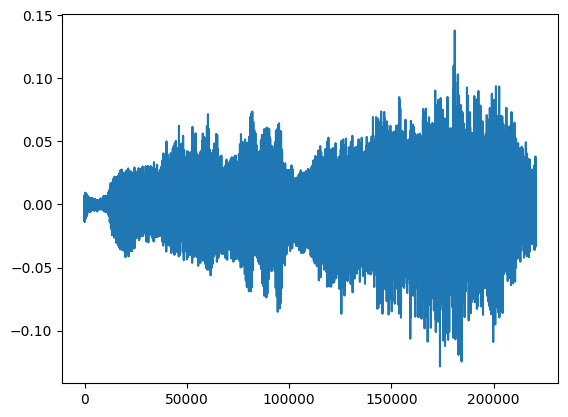

In [10]:
VER_MUESTRA = 10
graficar_muestra(VER_MUESTRA, muestras_wav)